# EDA and Preprocessing Pipelines for a Spotify Track Dataset

## Introduction

The following notebook shows the process of performing exploratory data analysis on a dataset containing Spotify track information, followed by the building of preprocessing pipelines for the features present in the dataset.

Part of the information contained within the dataset is a measure of track popularity. Thus, our objetive is to predict the popularity of a given song, making this a _**regression**_ problem.

Link to the dataset, sourced from Kaggle: https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025?select=track_data_final.csv

In [1]:
# Import the necessary libraries and methods

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

In [2]:
# Load the dataset as a pandas DataFrame

data = pd.read_csv('track_data_final.csv')
data

,track_id,track_name,track_number,track_popularity,track_duration_ms,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,213173,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,158760,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,225328,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,158463,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,267013,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8773,58VTP6KnZs12PcAj5rMJ4W,the fruits,1,65,209698,False,Paris Paloma,66.0,786890.0,[],48ssTnnFOCIP17sRaFNqu1,the fruits,2022-04-29,1,single
8774,2dRfUOeTVpr4V4PmmqGkpm,Dark World Theme (The Legend of Zelda),4,2,113143,False,Zelda,8.0,3263.0,[],0JJAfVZtn3EvZnXSQrpLSh,The Legend of Zelda,2023-08-19,7,album
8775,37F0uwRSrdzkBiuj0D5UHI,Reminder,4,81,218880,True,The Weeknd,94.0,113039308.0,[],2ODvWsOgouMbaA5xf0RkJe,Starboy,2016-11-25,18,album
8776,42qNWdLKCI41S4uzfamhFM,Duvet,1,84,203600,False,bôa,68.0,1188508.0,[],7sGYAV0xv7ZfAMzIpMl8m1,Twilight,2001-03-21,14,album


## Basic Information and Statistics

In [3]:
# Overview of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8778 entries, 0 to 8777
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8778 non-null   object 
 1   track_name          8776 non-null   object 
 2   track_number        8778 non-null   int64  
 3   track_popularity    8778 non-null   int64  
 4   track_duration_ms   8778 non-null   int64  
 5   explicit            8778 non-null   bool   
 6   artist_name         8774 non-null   object 
 7   artist_popularity   8774 non-null   float64
 8   artist_followers    8774 non-null   float64
 9   artist_genres       8774 non-null   object 
 10  album_id            8778 non-null   object 
 11  album_name          8776 non-null   object 
 12  album_release_date  8778 non-null   object 
 13  album_total_tracks  8778 non-null   int64  
 14  album_type          8778 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(8)
memory usag

In [4]:
# Summary statistics for numerical columns

data.describe().T

,count,mean,std,min,25%,50%,75%,max
track_number,8778.0,5.749487e+00,6.017938e+00,1.0,1.00,4.0,9.00,102.0
track_popularity,8778.0,5.223285e+01,2.407522e+01,0.0,39.00,58.0,71.00,100.0
track_duration_ms,8778.0,2.101578e+05,6.332684e+04,0.0,173921.25,207276.0,239693.25,811077.0
artist_popularity,8774.0,6.995498e+01,1.953278e+01,0.0,60.00,74.0,84.00,100.0
artist_followers,8774.0,2.435487e+07,3.813769e+07,0.0,515276.75,6272266.5,30550549.00,145542136.0
album_total_tracks,8778.0,1.377979e+01,1.179794e+01,1.0,6.00,13.0,17.00,181.0


With this, we can see that we have the following columns:

- `track_id`: Spotify's internal unique identifier for each song
- `track_name`: Name of the song
- `track_number`: Position of the song in the tracklist
- `track_popularity`: Measure of the song's popularity (integer ranging from 0 to 100)
- `track_duration_ms`: Duration of the song measured in milliseconds
- `explicit`: Whether or not the song contains explicit lyrics (True or False)
- `artist_name`: Name of the artist behind the song
- `artist_popularity`: Measure of the artist's popularity (integer ranging from 0 to 100)
- `artist_followers`: Number of followers the artist has on Spotify
- `artist_genres`: List of genres Spotify has tagged the artist with
- `album_id`: Spotify's internal unique identifier for the album containing the song
- `album_name`: Name of the album containing the song
- `album_release_date`: Date in which the album was released (YYYY-MM-DD format)
- `album_total_tracks`: Number of tracks the album contains
- `album_type`: Kind of album containing the song (single, album, or compilation)

Some of these columns will be excluded from analysis for various reasons.
- The columns `track_id`, `track_name`, `artist_name`, `album_id`, and `album_name` do not provide useful information for predicting the popularity of a track.
- Although `track_number` and `album_total_tracks` may contain useful data that could explain the popularity of a track in relation to its position along an album, the presence of singles in the dataset will skew the training of the model. These columns could be included if we decided to only focus on rows with `album_type` "album".
- The `artist_genres` column cannot be excluded from consideration just yet. However, its formatting is very inconsistent and has very high cardinality (around 423 genres, give or take), so it will be excluded from visualization for now.

## Visualization of Numerical Features

Now we can go ahead and visualize our dataset. Before continuing, we will split the `album_release_date` column in two: `album_release_year` and `album_release_month`.

In [5]:
data = data[:][data['album_release_date'].str.contains('-').to_list()]

data['album_release_date'] = pd.to_datetime(data['album_release_date'], format='mixed')
data['album_release_year'] = data['album_release_date'].dt.year
data['album_release_month'] = data['album_release_date'].dt.month
data[['album_release_date', 'album_release_year', 'album_release_month']]

,album_release_date,album_release_year,album_release_month
0,2009-11-09,2009,11
1,2023-01-13,2023,1
2,2021-04-09,2021,4
3,2021-07-30,2021,7
4,2010-01-01,2010,1
...,...,...,...
8773,2022-04-29,2022,4
8774,2023-08-19,2023,8
8775,2016-11-25,2016,11
8776,2001-03-21,2001,3


Even if we just split the dates in two, `album_release_month` is categorical in nature, so it will be visualized in the next section.

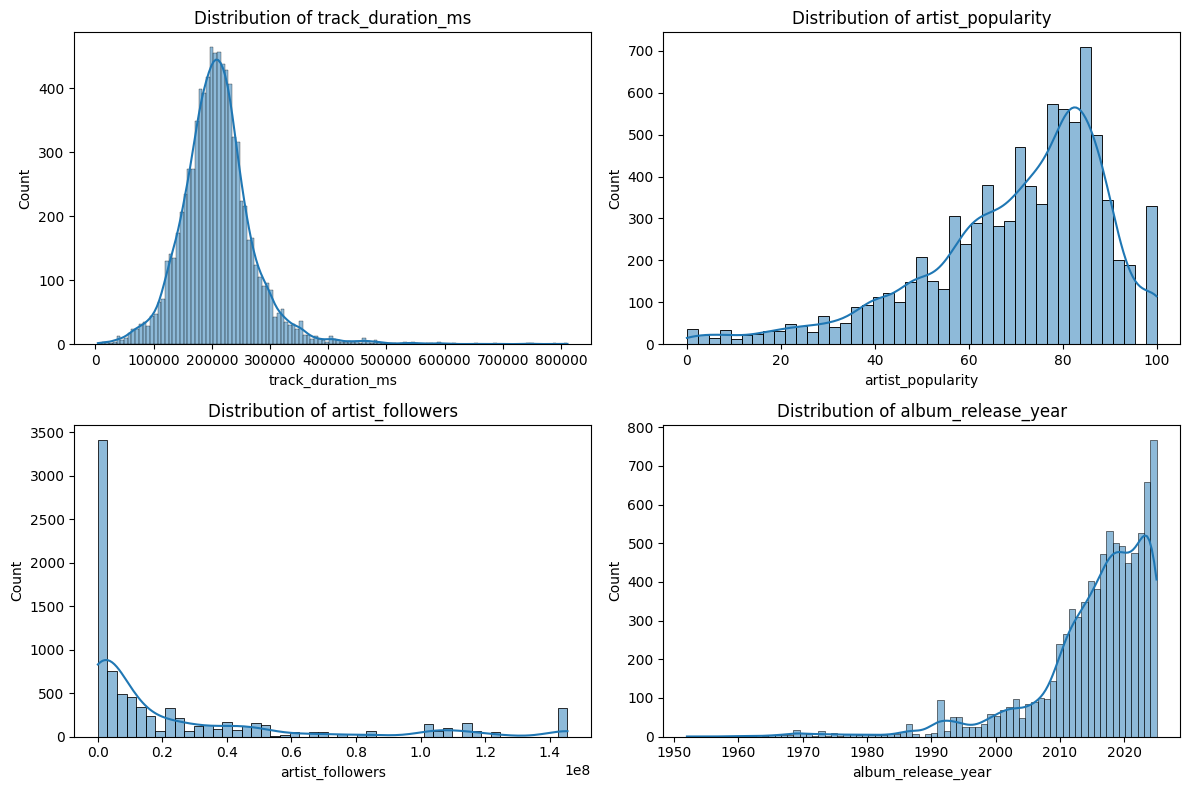

In [6]:
# Using the seaborn library to create histograms with KDE for each column

numerical_cols = ['track_duration_ms', 'artist_popularity',
                  'artist_followers', 'album_release_year']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.histplot(data[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

fig.tight_layout()

We can see that `track_duration_ms` is the only column with a nice Gaussian-like distribution. `album_release_year` is right-leaning because the dataset includes proportionately way more recent songs. `artist_followers` is basically a logarithmic curve, with the majority of artists barely scratching a million followers, meanwhile Taylor Swift has 140 million.

The four columns considered here all use wildly different scales, so we should consider using scaling techniques for the purposes of our model. As mentioned, `artist_followers` is very logarithmic, so we should also consider applying a power transformation to reduce the impact of the swifties in our analysis.

## Visualization of Categorical Features

Now we can visualize the categorical features in the dataset. For reasons mentioned previously, we are skipping `artist_genres`.

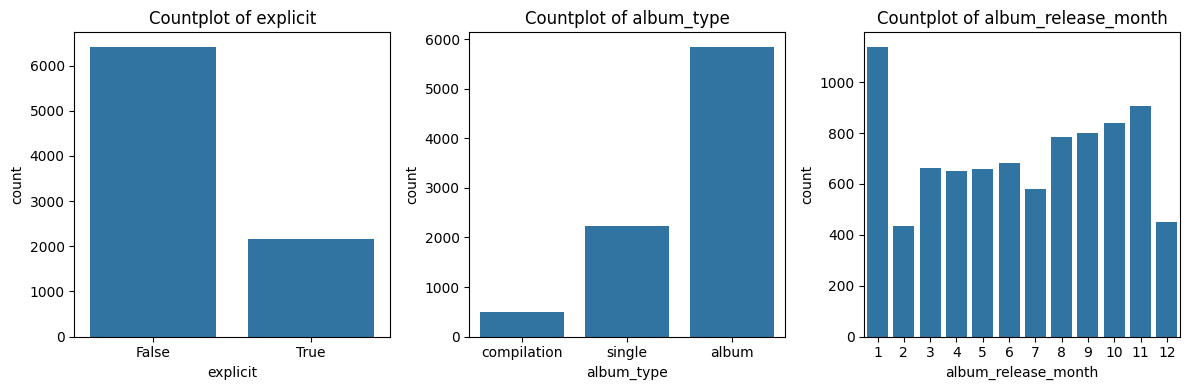

In [7]:
categorical_cols = ['explicit', 'album_type', 'album_release_month']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.countplot(data=data, x=col, ax=ax)
    ax.set_title(f'Countplot of {col}')

fig.tight_layout()

With this we can gather there's about 3 times as many songs with clean lyrics as there are songs marked explicit. The majority of the tracks represented in the dataset are album tracks, but there's a good amount of singles too, with comparatively less tracks belonging to compilations. Finally, we can see the slightest bit of a tendency for songs to be released later in the year rather than earlier, though December has relatively fewer songs (may be holidays related) and January has way more songs than any other month. This last observation may indicate the presence of a lot of tracks marked as being released on January 1st due to lacking original release info.

For preprocessing, we will use one-hot encoding on `album_type` to convert the variable into a format that plays nicely with the training model. The rest of the features can be left as is.

## Target Label Distribution

We will now look at the distribution of the feature we have chosen to predict, `track_popularity`.

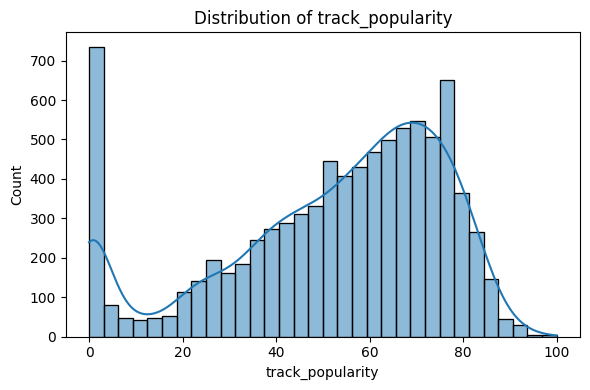

In [8]:
fig = plt.figure(figsize=(6, 4))
sns.histplot(data['track_popularity'], kde=True)
plt.title('Distribution of track_popularity')
plt.tight_layout()

There's an alarming amount of songs with close to 0 popularity, but otherwise we see a distribution we would expect.

We can visualize how `track_popularity` compares to both numerical and categorical features. For the numerical columns, we can graph a scatterplot.

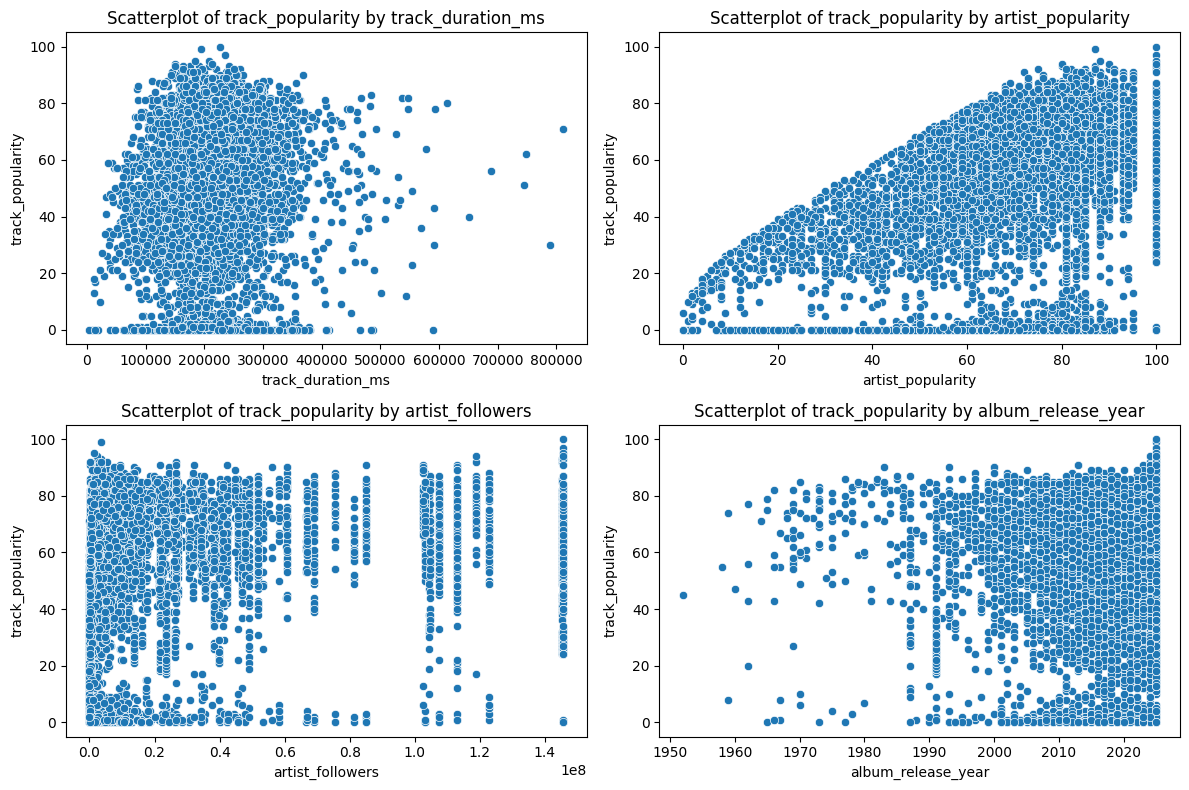

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axs.ravel(), numerical_cols):
    sns.scatterplot(data=data, x=col, y='track_popularity', ax=ax)
    ax.set_title(f'Scatterplot of track_popularity by {col}')

fig.tight_layout()

Most of these graphs seem to just follow the numerical features' distributions, with `track_popularity` uniformly distributed along them. Some quirks in the graphs can be mostly be attributed to quirks in the set we are working with. The only graph we can seemingly glean information from is the one comparing `track_popularity` with `artist_popularity`, as it shows that only artists with a lot of followers tend to have the most popular songs.

For the categorical features, we can use boxplots as a method of visual comparison.

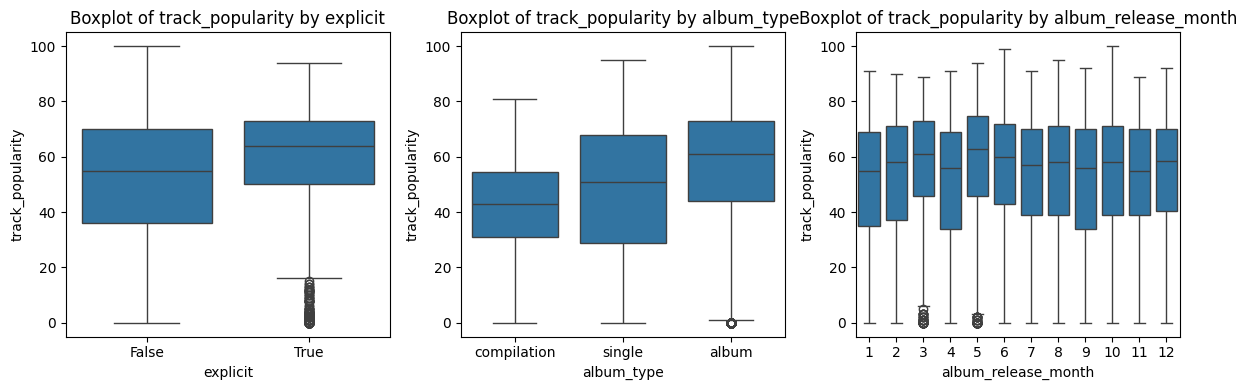

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for ax, col in zip(axs.ravel(), categorical_cols):
    sns.boxplot(data=data, x=col, y='track_popularity', ax=ax)
    ax.set_title(f'Boxplot of track_popularity by {col}')

fig.tight_layout()

Nothing to special can be inferred from the plots as they all seem pretty uniform. The only thing to note here is the amount of unpopular explicit songs that seem to go against the majority of other explicit songs.

For a more mathematical measure of the relationships between features, we can use a correlation matrix. The matrix will compare all numerical features, as well as `explicit`, `album_release_month`, and our target `track_popularity`.

The only column not included is `album_type` because it is a categorical feature represented as strings.

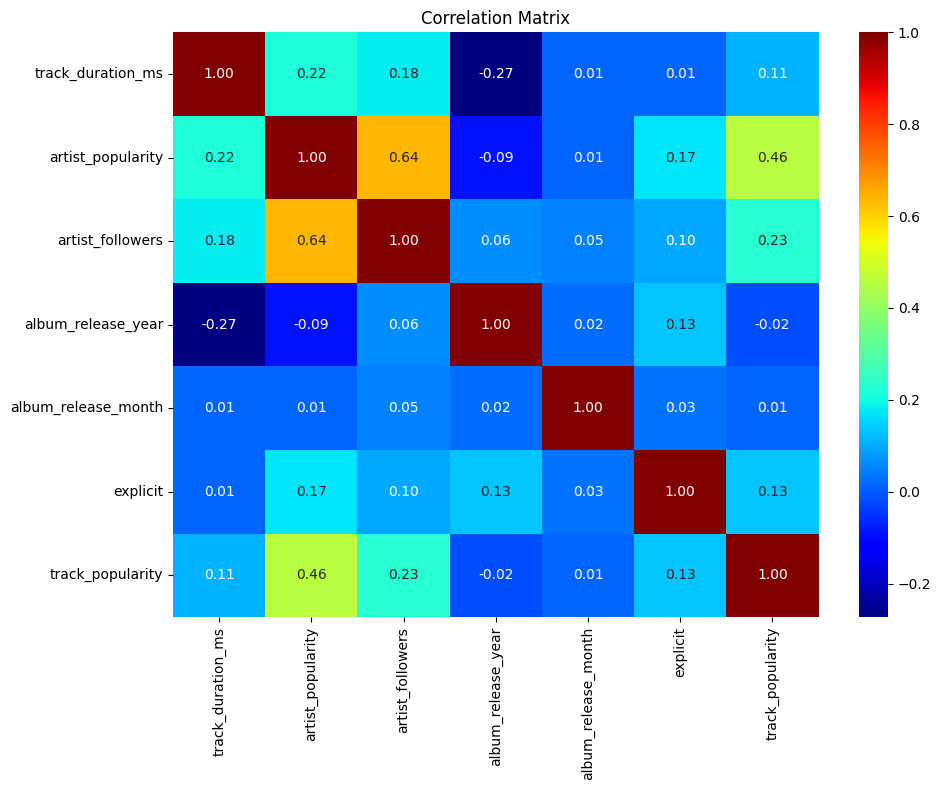

In [11]:
correlation_cols = numerical_cols + ['album_release_month', 'explicit', 'track_popularity']
corr_matrix = data[correlation_cols].corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='jet', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()

## Handling Missing Values

It is important to account for missing values in the dataset. We can see which features contain missing values in the following cell.

,0
artist_genres,51.526807
artist_name,0.046620
artist_popularity,0.046620
artist_followers,0.046620
track_id,0.000000
track_duration_ms,0.000000
track_popularity,0.000000
track_number,0.000000
track_name,0.000000
explicit,0.000000


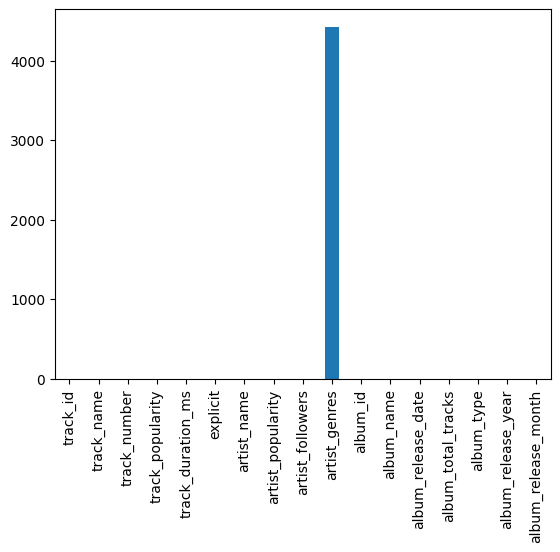

In [12]:
missing_counts = data.isnull().sum()
missing_counts['artist_genres'] = (data['artist_genres'] == "[]").sum()
missing_counts.plot(kind='bar')

missing_percent = data.isnull().mean() * 100
missing_percent['artist_genres'] = (data['artist_genres'] == "[]").mean() * 100
missing_percent.sort_values(ascending=False)

Note that any instance of an empty list represented as "[]" in the `artist_genres` column is being counted as a missing value.

With this, we can come up with appropriate strategies for handling missing values in preprocessing. Specifically:

- `artist_genres`: Omit the column entirely due to high cardinality of missing values.
- `artist_popularity` and `artist_followers`: Impute missing values with the most frequent value in the column.

## Preprocessing Pipelines

During initial exploration, we already decided which transformations we should apply to each column for preprocessing. In summary:

- To the `album_type` categorical column: Apply one-hot encoding.
- To the `track_duration_ms` and `album_release_year` numerical columns: Apply standard scaling.
- To the `artist_popularity` numerical column: Impute missing values with the most frequent value, followed by standard scaling.
- To the `artist_followers` numerical column: Impute missing values with the most frequent value, apply a power transformation to make the distribution more Gaussian-like, and finally apply standard scaling.
- The remaining columns will remain the same after preprocessing. In this case, both `explicit` and `album_release_month` will remain as is due to being categorical but represented as booleans and integers respectively.

In [13]:
preprocessing_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), ['album_type']),
            ('num', StandardScaler(), ['track_duration_ms', 'album_release_year']),
            ('num_popularity', make_pipeline(SimpleImputer(strategy='most_frequent'), StandardScaler()), ['artist_popularity']),
            ('num_followers', make_pipeline(SimpleImputer(strategy='most_frequent'), PowerTransformer(), StandardScaler()), ['artist_followers']),
        ],
        remainder='passthrough', # Pass through any remaining columns without changes
    )
)

We will define our feature matrix `x` and target vector `y`, and then split the dataset into training and testing sets using an 80-20 split.

In [14]:
x = data[['track_duration_ms', 'artist_popularity', 'artist_followers', 'album_release_year',
         'album_release_month', 'explicit', 'album_type']]
y = data['track_popularity']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

Now we apply the processing pipeline to both our sets.

In [15]:
# Using fit_transform to fit the pipeline and transform the data in one step

x_train_processed = preprocessing_pipeline.fit_transform(x_train, y_train)
x_train_processed

array([[1.0, 0.0, 0.0, ..., -0.07453019042304977, 12, False],
       [1.0, 0.0, 0.0, ..., 0.22981922133075658, 9, False],
       [1.0, 0.0, 0.0, ..., -0.9832416591733806, 4, False],
       ...,
       [1.0, 0.0, 0.0, ..., 1.710670953522209, 1, False],
       [0.0, 0.0, 1.0, ..., 0.9570075570267464, 2, True],
       [1.0, 0.0, 0.0, ..., 0.2459396512921294, 12, False]], dtype=object)

In [16]:
# Using transform to apply the same transformations learned from the training data

x_test_processed = preprocessing_pipeline.transform(x_test)
x_test_processed

array([[1.0, 0.0, 0.0, ..., 1.300792786446912, 5, False],
       [1.0, 0.0, 0.0, ..., 0.6248343001653379, 4, True],
       [1.0, 0.0, 0.0, ..., -0.14377382380725817, 6, False],
       ...,
       [1.0, 0.0, 0.0, ..., -0.5719439816710182, 9, False],
       [1.0, 0.0, 0.0, ..., -1.3647597129870837, 6, False],
       [1.0, 0.0, 0.0, ..., 1.5792870524718479, 3, False]], dtype=object)

## Building a Regression Model

With the preprocessing pipeline done and ready, it's time to build a regression model using linear regression.

We will create a complete pipeline that includes both the preprocessing steps and the linear regression model. By including the preprocessing pipeline within the model pipeline, the model will be able to handle raw input data directly.

In [17]:
regression_model = make_pipeline(
    preprocessing_pipeline,
    LinearRegression()
)
regression_model

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   OneHotEncoder(),
                                                                   ['album_type']),
                                                                  ('num',
                                                                   StandardScaler(),
                                                                   ['track_duration_ms',
                                                                    'album_release_year']),
                                                                  ('num_popularity',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['artist_popularity']),
                                                                  ('num_followers',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('powertransformer',
                                                                                    PowerTransformer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['artist_followers'])]))])),
                ('linearregression', LinearRegression())])

The `regression_model` object is now a complete pipeline that first preprocesses the raw input data and then applies linear regression to predict our target label.

We will fit the model to the training data using the `fit` method, which first calls the `fit_transform` method of the preprocessing pipeline on the training data and then fits the linear regression model on the transformed data.

In [18]:
regression_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('cat',
                                                                   OneHotEncoder(),
                                                                   ['album_type']),
                                                                  ('num',
                                                                   StandardScaler(),
                                                                   ['track_duration_ms',
                                                                    'album_release_year']),
                                                                  ('num_popularity',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['artist_popularity']),
                                                                  ('num_followers',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('powertransformer',
                                                                                    PowerTransformer()),
                                                                                   ('standardscaler',
                                                                                    StandardScaler())]),
                                                                   ['artist_followers'])]))])),
                ('linearregression', LinearRegression())])

With the model ready, we can start making predictions on the test data using the `predict` method. Similarly to `fit`, it first calls the `transform` method of the preprocessing pipeline on the test data and then makes predictions using the linear regression model.

In [19]:
y_test_pred = regression_model.predict(x_test)
y_test_pred

array([61.03205883, 62.61048574, 66.71257068, ..., 49.1491589 ,
       37.49125383, 59.55176781])

To evaluate the model's performance, we will compare the predicted labels with the actual labels from the test set. The following DataFrame shows both the predicted and actual labels side by side for each song in the test set.

In [20]:
x_test['track_popularity_predicted'] = y_test_pred
x_test['track_popularity_actual'] = y_test.values
x_test

,track_duration_ms,artist_popularity,artist_followers,album_release_year,album_release_month,explicit,album_type,track_popularity_predicted,track_popularity_actual
6671,230192,90.0,75492598.0,2010,5,False,album,61.032059,80
900,259413,83.0,21591569.0,2013,4,True,album,62.610486,41
6518,182016,87.0,3568209.0,2025,6,False,album,66.712571,91
7082,211253,85.0,45777722.0,2020,7,False,single,57.247457,10
2284,297973,74.0,13708054.0,2001,1,False,album,53.667586,44
...,...,...,...,...,...,...,...,...,...
5261,268434,71.0,12752220.0,2018,8,True,album,54.790896,76
6043,182163,83.0,66720643.0,2021,11,False,album,55.888519,59
4654,304600,62.0,997137.0,1996,9,False,album,49.149159,78
4070,148146,42.0,35140.0,2014,6,False,album,37.491254,36
